**Analyze the Income Gap between Female and Male Employees**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [5]:
empdata= pd.read_csv('/content/sample_data/multipleChoiceResponses.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
empdata_surveyques=empdata.iloc[0]
empdata_surveyques

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                What is your gender? - Selected Choice
Q1_OTHER_TEXT                          What is your gender? - Prefer to self-describe...
Q2                                                           What is your age (# years)?
Q3                                             In which country do you currently reside?
                                                             ...                        
Q50_Part_5                             What barriers prevent you from making your wor...
Q50_Part_6                             What barriers prevent you from making your wor...
Q50_Part_7                             What barriers prevent you from making your wor...
Q50_Part_8                             What barriers prevent you from making your wor...
Q50_OTHER_TEXT                         What barriers prevent you from making your wor...
Name: 0, Length: 395,

In [7]:
empdata=empdata.drop(empdata.index[0])
empdata.iloc[0]

Time from Start to Finish (seconds)                         710
Q1                                                       Female
Q1_OTHER_TEXT                                                -1
Q2                                                        45-49
Q3                                     United States of America
                                                 ...           
Q50_Part_5                                                  NaN
Q50_Part_6                                                  NaN
Q50_Part_7                                                  NaN
Q50_Part_8                                                  NaN
Q50_OTHER_TEXT                                               -1
Name: 1, Length: 395, dtype: object

In [8]:
empdata.Q1.unique()

array(['Female', 'Male', 'Prefer not to say', 'Prefer to self-describe'],
      dtype=object)

In [9]:
empdata['Q9'].value_counts()

I do not wish to disclose my approximate yearly compensation    4756
0-10,000                                                        4398
10-20,000                                                       1937
20-30,000                                                       1395
30-40,000                                                       1119
40-50,000                                                        965
50-60,000                                                        919
100-125,000                                                      843
60-70,000                                                        729
70-80,000                                                        677
90-100,000                                                       566
125-150,000                                                      533
80-90,000                                                        506
150-200,000                                                      457
200-250,000                       

In [10]:
#filtered unnecessary records from the dataset
empdata=empdata[empdata['Q9']!='I do not wish to disclose my approximate yearly compensation']
empdata=empdata[empdata['Q9'].notnull()]

In [11]:
#Assigning appropriate values for a compensation column with dictionary and created new column "Income"
compensation = {'0-10,000': 5000, '10-20,000': 15000, '20-30,000': 25000, '30-40,000': 35000, 
       '40-50,000': 45000, '50-60,000': 55000, '60-70,000': 65000, '70-80,000': 75000, 
       '80-90,000': 85000, '90-100,000': 95000, '100-125,000': 112500, 
       '125-150,000': 137500, '150-200,000': 175000, '200-250,000': 225000, 
       '250-300,000': 275000, '300-400,000': 350000, '400-500,000': 450000, 
       '500,000+':500000}

empdata['Income'] = empdata['Q9'].apply(lambda x: compensation[x])

**1. Calculate the median income of male employees and the median income of female employee in the population.**

In [12]:
female_emp=empdata['Q1']=='Female'
print('The Median Income of Female Employees:',empdata.loc[female_emp,'Income'].median())

The Median Income of Female Employees: 25000.0


In [13]:
male_emp=empdata['Q1']=='Male'
print('The Median Income of Male Employees:',empdata.loc[male_emp,'Income'].median())

The Median Income of Male Employees: 35000.0


**2. Draw an overlaid graph to show the histograms of the incomes of female and male employees in the population. (You create one histogram for male, and another histogram for female, but the two histograms will be displayed in the same graph with different colors).**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


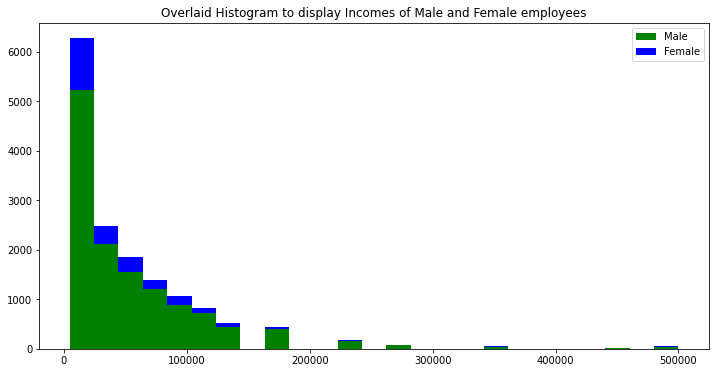

In [30]:
plot.figure(figsize=(12,6))
plot.hist([empdata.loc[male_emp,'Income'],empdata.loc[female_emp,'Income']], bins=25,label=['Male','Female'],color=['g','b'],stacked=True)

plot.title('Overlaid Histogram to display Incomes of Male and Female employees')
plot.legend()
plot.show()

**3. Use the random sampling, empirical distribution, sample comparison, bootstrap, hypothesis testing as well as A/B testing we discussed in the class to analyze the income gap between female and male employees.**

**i) Select a sample from the population. Make sure your sample include 500 employees selected from the population, and consider how to ensure the sampling strategy is fair since the datasets include overwhelmed male employees than female employees**

In [15]:
empdata['Q1'].value_counts()

Male                       12866
Female                      2380
Prefer not to say            130
Prefer to self-describe       53
Name: Q1, dtype: int64

In [16]:
empdata_1=empdata[empdata['Q1']!='Prefer not to say']
empdata_1=empdata_1[empdata_1['Q1']!='Prefer to self-describe']
empdata_1['Q1'].value_counts()

Male      12866
Female     2380
Name: Q1, dtype: int64

In [17]:
empdata_sample = (empdata_1.groupby('Q1', as_index=False).apply(lambda x: x.sample(n=250)).reset_index(drop=True))

In [18]:
empdata_sample['Q1'].value_counts()

Male      250
Female    250
Name: Q1, dtype: int64

**ii) Define test statistic, null hypothesis and alternative hypothesis (1 point).**

**Test Statistics:** To simulate the Median Income compensation of a randam sample (Size n=500) of Male and Female employees drawn from the population of responses given in the survey data.

**Null Hypothesis:** The Median Income compensation of Male and Female employees are equal.

**Alternative Hypothesis:** The Median Income compensation of Male and Female employees are not equal (which means there is a significant statistical compensation difference between them).

**iii) Draw the income histogram for the sample, calculate the median income of the sample, and draw a red dot and a yellow dot of the female median income and male median income of the population, respectively, in the histogram**

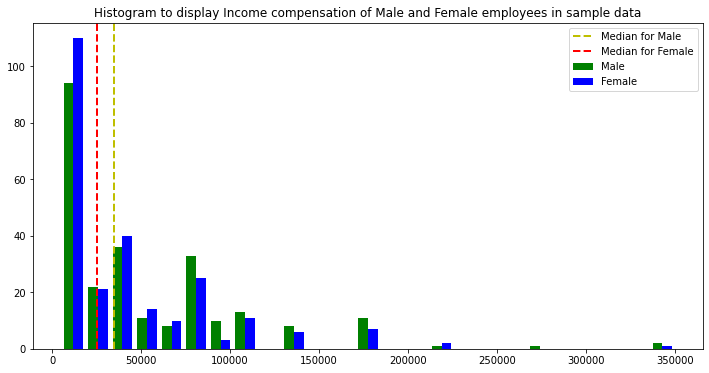

In [19]:
plot.figure(figsize=(12,6))
plot.hist([empdata_sample.loc[empdata_sample['Q1']=='Male','Income'],empdata_sample.loc[empdata_sample['Q1']=='Female','Income']], bins=25,label=['Male','Female'],color=['g','b'])
plot.title('Histogram to display Income compensation of Male and Female employees in sample data')

Population_Median_Male_Comp=empdata.loc[empdata['Q1']=='Male','Income'].median()
Population_Median_Female_Comp=empdata.loc[empdata['Q1']=='Female','Income'].median()

Sample_Median_Male_Comp=empdata_sample.loc[empdata_sample['Q1']=='Male','Income'].median()
Sample_Median_Female_Comp=empdata_sample.loc[empdata_sample['Q1']=='Female','Income'].median()

plot.axvline(Population_Median_Male_Comp, color = 'y', linestyle = 'dashed', linewidth = 2, label='Median for Male')
plot.axvline(Population_Median_Female_Comp, color = 'r', linestyle = 'dashed', linewidth = 2, label='Median for Female')
plot.legend()
plot.show()

In [20]:
print('The Median Income of Male Employees in sample data:',Sample_Median_Male_Comp)
print('The Median Income of Female Employees in sample data:',Sample_Median_Female_Comp)

The Median Income of Male Employees in sample data: 35000.0
The Median Income of Female Employees in sample data: 25000.0


**iv) Draw the histogram of the test statistic of the sample, and draw a red dot to show the corresponding test
statistic of the population (e.g. the difference of the median incomes between female and male employees)
in the diagram**

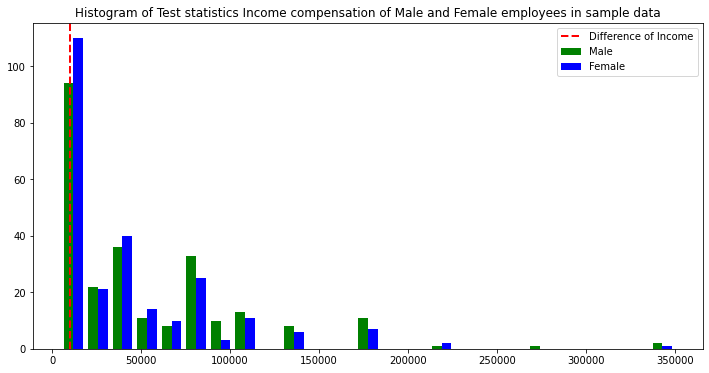

In [21]:
plot.figure(figsize=(12,6))
plot.hist([empdata_sample.loc[empdata_sample['Q1']=='Male','Income'],empdata_sample.loc[empdata_sample['Q1']=='Female','Income']], bins=25,label=['Male','Female'],color=['g','b'])

difference_income_pop=empdata.loc[empdata['Q1']=='Male','Income'].median()-empdata.loc[empdata['Q1']=='Female','Income'].median()

plot.title('Histogram of Test statistics Income compensation of Male and Female employees in sample data')
plot.axvline(difference_income_pop, color = 'r', linestyle = 'dashed', linewidth = 2, label='Difference of Income')
plot.legend()
plot.show()

In [22]:
print("Difference of the Median incomes between female and male employees of the Population:",difference_income_pop)

Difference of the Median incomes between female and male employees of the Population: 10000.0


**v) Write a procedure to use bootstrap to produce at least 5000 samples.**

**Steps for Bootstrapping:**
* A sample from population with sample size 500.
* Draw a sample from the original sample data with replacement with size 500, and replicate 5000 times, each re-sampled sample is called a Bootstrap Sample, and there will totally 5000 Bootstrap Samples.
* Evaluate the mean/median for each Bootstrap Sample, and there will be totally 5000 estimates of re-sampled samples.
* Construct a sampling distribution i.e. Mean/Median Difference with these 5000 Bootstrap statistics by storing it in array and use it to make further statistical inference like histograms etc.

In [25]:
gender_group=empdata.groupby('Q1')

sample_array = []

#Generate 5000 resamples randomly from Dataset without replacement of records
emp_df_sample=empdata.sample(5000,replace=False) 

#selecting Gender column and Income compensation column
emp_df_sample=emp_df_sample[['Q1','Income']]
for i in range(500):
    # Random samples of 5000 with replacment
    bootstrap_sample=emp_df_sample.sample(5000,replace=True)
    bootstrap_sample_grp=bootstrap_sample.groupby('Q1')
    #Male Average Salary
    bootrap_male_mean=bootstrap_sample_grp.get_group('Male')['Income'].mean() 
    #Female Average Salary
    bootrap_female_mean=bootstrap_sample_grp.get_group('Female')['Income'].mean()
    sample_array.append(bootrap_male_mean-bootrap_female_mean)
# Random Bootstrap Samples from array_ls to samples
samples=pd.DataFrame(sample_array,columns=['Bootstrap_values']) 
# 5 % data in normal distribution - first extreme
firsttext=samples.Bootstrap_values.quantile(0.050) 
#95 % of data in normal distribution - last extreme
lasttext=samples.Bootstrap_values.quantile(0.950) 
print(f"The Mean of original data is between {firsttext} and {lasttext}")

The Mean of original data is between 2770.4793061452383 and 9527.243006438137


**vi) Draw the histogram of the test statistic of the bootstrap samples (1 point).**

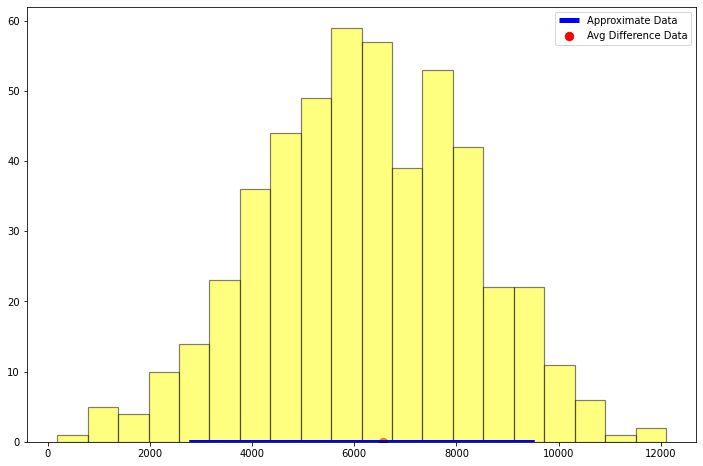

In [28]:
# Average Male of Original population
male_average=gender_group.get_group('Male')['Income'].mean()

#Average Female of original population
female_average=gender_group.get_group('Female')['Income'].mean() 

# Difference of Male average and Female average incomes compensation
Avg_diff=male_average-female_average 

histogram = plot.figure(figsize=(12,8))
# Histogram to show Bootstarp samples
plot.hist(sample_array,bins=20,alpha=0.5,color='yellow',edgecolor='black', linewidth=1.2) 

# Line to display the approximate data around the mean
plot.hlines((0,0),firsttext,lasttext, colors='blue', linestyles='solid',linewidth=5,label='Approximate Data') 
#To plot Dot using scatter plot of average difference
plot.scatter(Avg_diff,0,color='red',s=70,label='Avg Difference Data') 
plot.legend()

**vii) Define confidence interval and P-value to validate the hypothesis you defined**

**Confidence Interval:** The confidence interval is an estimator we use to estimate the value of population parameters.It is the range of values that's likely to include a population value with a certain degree of confidence. When we create the interval, we use a sample mean. It is often expressed a % whereby a population means lies between an upper and lower interval.

**P-Value:** It is also called Observed Significance Level. The P-value of a test is the chance, based on the model in the null hypothesis, that the test statistic is equal to the value that was observed in the data or is even further in the direction of the alternative. The interval will create a range that might contain the values. When we create the interval, we use a sample mean. Confidence interval can take number of probabilities, most common being a 95 to 99% confidence level.

P value is: 0.8777555110220441


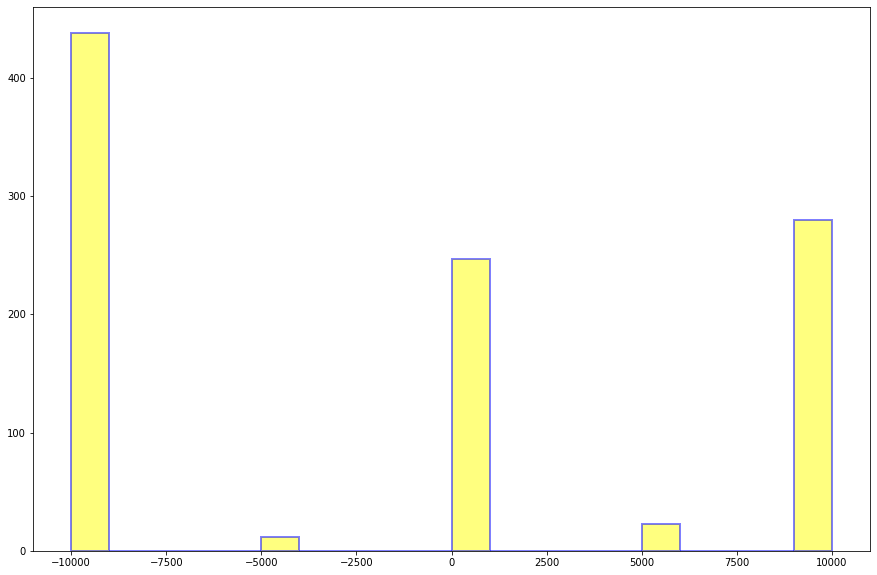

In [29]:
x = []
p=empdata[['Q1','Income']]
for temp in range(1000):
  i_d=p.sample(len(p),replace=False)['Q1'].reset_index()['Q1']

  data={'Q1data':i_d}
  df2 = pd.DataFrame(data)
  
  a1=p['Q1'].reset_index()['Q1']
  a2=p['Income'].reset_index()['Income']
  
  df2['Income']=a2
  df2['gender']=a1
  i_g=df2.groupby('Q1data')
  i_m=i_g.get_group('Male')['Income'].median() 
  i_f=i_g.get_group('Female')['Income'].median()
  x.append(i_m-i_f)
grp=empdata.groupby('Q1')

median_male=grp.get_group('Male')['Income'].median() 
median_female=grp.get_group('Female')['Income'].mean() 
diff=median_male-median_female 

histogram = plot.figure(figsize=(15,10))
plot.hist(x,bins=20,alpha=0.5,color='yellow',edgecolor='blue', linewidth=2)
x=np.array(x)
P1=np.count_nonzero( x <= diff ) / i #Storing P value
print("P value is:",P1)

**Result Interpretation:** As the P-value is less than 0.05, it is considered as very small and the result is statistically significant, which means that the tail beyond the observed statistic is small and so the observed statistic is far away from what the null hypothesis predicts. This implies that the data supports the alternative hypothesis better than null hypothesis i.e Median Income compensation of Male and Female employees are not equal, they are statistically different

In-short, it can be stated that the test favors the alternative hypothesis - "rejects the null hypothesis"